# Assignment 1 - _Foundations of Information Retrieval 2021_

This assignment is divided in 4 parts, which have to be delivered all together no later than 04/10/2021 (strict - no extensions will be granted!), via Canvas. Delivery of the assignment solutions is mandatory (_see grading conditions on Canvas and in slides of Lecture01_).

We will use [ElasticSearch](https://www.elastic.co/) as search engine. It provides state-of-the-art tools to implement your own engine, index your documents, and let you focus on methodological aspects of search models and optimization. 

The assignment is about text-based Information Retrieval and it is structured in three parts:
1. IR performance evaluation (implementation of performance metrics)
2. Setting up a search engine, pre-processing and indexing using ElasticSearch (Indexing, Analyzers)
3. Implementation and optimization of models of search (Similarity)


This assignment contains exercises, marked with the section title __Exercise 01.(x)__, which are evaluated, and other sections that contain support code which you should study and use as it is. Write your answers between the comments `BEGIN ANSWER` and `END ANSWER`. 

_Note:_ the comment `#THIS IS GRADED!` in a section indicates that it will be graded.


### Initial preparation (self-study)
For the first part, it is good to acquire (or refresh) basic knowledge of Python. Please use the [Python tutorials](https://docs.python.org/3/tutorial/) if needed.

For the second and third part of the assignment, please study yourself the [Getting Started guide](https://www.elastic.co/guide/en/elasticsearch/reference/current/getting-started.html) of ElasticSearch and get acquainted with the framework.


***
***
***

# PART 01 - Performance evaluation


### Background information and reading
Study the slides of Lecture 01 (available on Canvas) and the reference book chapter (Christopher D. Manning, Prabhakar Raghavan and Hinrich Schütze, Introduction to Information Retrieval, [Chapter 8, Evaluation in information retrieval](http://nlp.stanford.edu/IR-book/pdf/08eval.pdf), Cambridge University Press. 2008)

### Basic concepts
Suppose the set of relevant documents (the document identifiers - _doc-IDs_) is called `relevant`, then we  define it as follows (in Python):

In [1]:
relevant = set([2, 3, 5, 8, 13, 17, 21, 34, 38])

A perfect run would retrieve exactly these 9 documents in any order. Now, suppose the list of retrieved documents (the document identifiers - _doc-IDs_) is called `retrieved`, and contains the following _doc-IDs_:

In [2]:
retrieved = [14, 4, 2, 18, 16, 8, 46, 32, 17, 34, 33, 22, 47, 39, 11]

One of the simplest evaluation measures is the _Success at rank 1_, i.e. `Is the first document retrieved a relevant document?`

_Success at rank 1_ returns 1 if the first document is relevant, and 0 otherwise. A possible implementation is: 

In [3]:
def success_at_1 (relevant, retrieved):
    if len(retrieved) > 0 and retrieved[0] in relevant:
        return 1
    else:
        return 0

success_at_1(relevant, retrieved)

0

The first retrieved documentid is 14 which is not in the set of relevant documents, so the `success_at_1` is 0.

_________________

> Note how easy it is to check if an item occurs in a Python set or list by using the keyword: `in`. Similarly, you can loop over all items in a set of list with: 
`for doc in retrieved:`, 
where doc will refer to each item in the set or list. 

Be sure to use the internet to sharpen your knowledge about Python constructs, for instance on [Python list slicing](https://duckduckgo.com/?q=python+list+slicing). Also note that the code above checks if at least one document is retrieved to avoid an index out of bounds exception (i.e. we avoid to access an empty vector).

> ___Suggestion:___ _to be sure of the correctness of the implementation of the performance metrics, you can compute their values manually and compare them with those computed by your functions. This is important, as you will use these metrics for later exercises and to compare the results of differentmodels._

## Preparation exercise: _Success at k_
The measure _Success at k_ returns 1 if a relevant document is among the first _k_ documents retrieved and zero otherwise.

> Success at _k_ measures are well-suited in case there is typically only one relevant document (or retrieving one relevant document is enough).

 __Implement _Success at 5_ below.__ 
 > The correct result is 1.

In [4]:
def success_at_5(relevant, retrieved):
    # BEGIN ANSWER
    check = False
    if len(retrieved) > 0:
        for i in range(5):
            if retrieved[i] in relevant:
                check = True  
                ## break because one relevant retrieved document is enough (decrease computational time)
                break
    if check:
        return 1
    else:
        return 0
    # END ANSWER
    
success_at_5(relevant, retrieved)

1

Similarly __implement success at rank 10__

> The correct result is 1.

In [5]:
def success_at_10(relevant, retrieved):
    # BEGIN ANSWER
    check = False
    if len(retrieved) > 0:
        for i in range(10):
            if retrieved[i] in relevant:
                check = True  
                ## break because one relevant retrieved document is enough (decrease computational time)
                break
    if check:
        return 1
    else:
        return 0
    # END ANSWER
    
success_at_10(relevant, retrieved)

1

## Exercise 01.A: _Precision, Recall and F-measure_
__1. Implement _Precision_ using Formula 8.1 from [Manning, Raghavan and Schütze](http://nlp.stanford.edu/IR-book).__

>_Hint:_ one can count the number of documents in a list using the built-in Python function [len()](https://docs.python.org/3/library/functions.html#len) \
> _example:_ `len(retrieved)` for the number of retrieved documents. 

In [6]:
#THIS IS GRADED!

def precision(relevant, retrieved):
    # BEGIN ANSWER
    numerator = list(set(relevant) & set(retrieved))
    
    precision = len(numerator) / len(retrieved)
    return precision
    # END ANSWER
    
precision(relevant, retrieved)

0.26666666666666666

__2. Implement _Recall_ using Formula 8.2 from [Manning, Raghavan and Schütze](http://nlp.stanford.edu/IR-book).__

In [7]:
#THIS IS GRADED!

def recall(relevant, retrieved):   
    # BEGIN ANSWER
    numerator = list(set(relevant) & set(retrieved))
    
    recall = len(numerator) / len(relevant)
    return recall
    # END ANSWER
    
recall(relevant, retrieved)

0.4444444444444444

__3. Implement the balanced F measure (_F_ with β=1) using Formula 8.6 from [Manning, Raghavan and Schütze](http://nlp.stanford.edu/IR-book).__

> Tip: you may reuse your implementations of precision and recall

In [8]:
#THIS IS GRADED!

def f_measure(relevant, retrieved):
    # BEGIN ANSWER
    beta = 1
    numerator = list(set(relevant) & set(retrieved))
    recall = len(numerator) / len(relevant)
    precision = len(numerator) / len(retrieved)

    f_measure = ((beta+1)*precision * recall)/((beta)*precision + recall)
    return f_measure
    # END ANSWER
    
f_measure(relevant, retrieved)

0.33333333333333337

## Exercise 01.B: _Precision at rank k_ and  _R-Precision_

Precision, Recall and F are _set_-based measures and suited for unranked lists of documents. If our search system returns a ranked _list_ of results, we can measure precision for several cut-off levels _k_ in the ranked list, i.e. we evaluate the relevance of the TOP-_k_ retrieved documents _(see lecture 01 slides and the book chapter)_. 


**1. Implement the function `precision_at_k()` that measures the precision at rank _k_**

> Interesting fact: For _k_=1, the _Precision at rank 1_ would be the samen as _Success at rank 1_ (why?) 

In [ ]:
'''
For k = 1, precision can only take two values, 0 and 1, since its denomitor is 1 and the numerator (the
intersection between the sets of relevant and retrieved) can be either 0 or 1. Thus, if the first element retrieved
is also in set of relevant documents both measures will score 1, 0 otherwise.
'''

In [14]:
#THIS IS GRADED!

def precision_at_k(relevant, retrieved, k):
    
    # BEGIN ANSWER
    
    retrieved_1 = (list(retrieved)[:k])
    numerator = list(set(relevant) & set(retrieved_1))    
    precision = len(numerator) / len(retrieved_1)
    return precision
    # END ANSWER

print('Pr@1: %1.2f' % precision_at_k(relevant, retrieved, k=1))
print('Pr@5: %1.2f' % precision_at_k(relevant, retrieved, k=5))
print('Pr@10: %1.2f' % precision_at_k(relevant, retrieved, k=10))


Pr@1: 0.00
Pr@5: 0.20
Pr@10: 0.40


__2. Implement R-Precision as defined in Chapter 8 of [Manning, Raghavan and Schütze](http://nlp.stanford.edu/IR-book)__.

In [15]:
#THIS IS GRADED!

def r_precision(relevant, retrieved):
    # BEGIN ANSWER
    R = len(list(relevant))
    r = 0
    for i in range(len(retrieved)):
        if retrieved[i] in relevant:
            r = r+1
    ## formula took by Craswell N. (2009) R-Precision. In: LIU L., ÖZSU M.T. (eds) Encyclopedia of Database Systems. Springer, Boston, MA. https://doi.org/10.1007/978-0-387-39940-9_486
    R_precision = r/R
    return R_precision
    # END ANSWER
    
r_precision(relevant, retrieved)

0.4444444444444444

## Exercise 01.D:  Interpolated precision at _recall_ X

Another way to address ranked retrieval is to measure precision for several _recall_ levels _X_.

__Implement the function `interpolated_precision_at_recall_X()` that measures the interpolated precision at recall level _X_ as defined by formula 8.7 of [Manning, Raghavan and Schütze](http://nlp.stanford.edu/IR-book).__

> Tip: calculate for each rank the recall. If the recall is greater than or equal to X, 
> calculate the precision. Keep the highest (maximum) precision of those to be returned at the end.

Pr_i@Re01: 0.40
Pr_i@Re02: 0.40
Pr_i@Re03: 0.40
Pr_i@Re04: 0.40
Pr_i@Re05: 0.00
Pr_i@Re06: 0.00
Pr_i@Re07: 0.00
Pr_i@Re08: 0.00
Pr_i@Re09: 0.00
Pr_i@Re10: 0.00


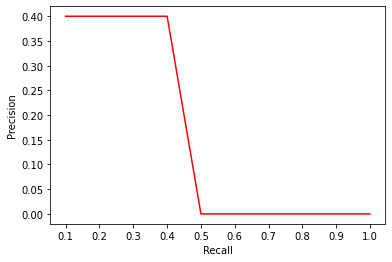

In [16]:
#THIS IS GRADED!

def interpolated_precision_at_recall_X (relevant, retrieved, X):
    # BEGIN ANSWER

    somma = []
    pp = []
    i = X
    relevant = list(relevant)
    retrieved = list(retrieved)
    while i <= 1:
        for j in range(len(retrieved)):
            if retrieved[j] in relevant:
                rec = recall(relevant[:j+1], retrieved[:j+1])
                prec = precision(relevant[:j+1], retrieved[:j+1])
                if rec >= i:
                    pp.append(prec)
                
        i = round(i+0.1,2)
    if (len(pp) > 0):
        return max(pp)
    else:
        return 0


    # END ANSWER
    
 



print('Pr_i@Re01: %1.2f' % interpolated_precision_at_recall_X(relevant, retrieved, X=0.1))
print('Pr_i@Re02: %1.2f' % interpolated_precision_at_recall_X(relevant, retrieved, X=0.2))
print('Pr_i@Re03: %1.2f' % interpolated_precision_at_recall_X(relevant, retrieved, X=0.3))
print('Pr_i@Re04: %1.2f' % interpolated_precision_at_recall_X(relevant, retrieved, X=0.4))
print('Pr_i@Re05: %1.2f' % interpolated_precision_at_recall_X(relevant, retrieved, X=0.5))
print('Pr_i@Re06: %1.2f' % interpolated_precision_at_recall_X(relevant, retrieved, X=0.6))
print('Pr_i@Re07: %1.2f' % interpolated_precision_at_recall_X(relevant, retrieved, X=0.7))
print('Pr_i@Re08: %1.2f' % interpolated_precision_at_recall_X(relevant, retrieved, X=0.8))
print('Pr_i@Re09: %1.2f' % interpolated_precision_at_recall_X(relevant, retrieved, X=0.9))
print('Pr_i@Re10: %1.2f' % interpolated_precision_at_recall_X(relevant, retrieved, X=1))

x = []
values = []

for i in range(1,11):
    X = i * 0.1
    v = interpolated_precision_at_recall_X(relevant, retrieved, X=X)
    x.append(round(X,2))
    values.append(v)
import matplotlib.pyplot as plt
%matplotlib inline  

plt.plot(x, values, color="red")

plt.ylabel('Precision')
plt.xlabel('Recall')
plt.xticks(x)
plt.show()

## Exercise 01.E:  _Average Precision_

For a single information need, _Average Precision_ is the average of the precision value obtained for the set of top k documents existing after each relevant document is retrieved (see [Manning, Raghavan and Schütze](http://nlp.stanford.edu/IR-book), Pages 159 and 160). 

__Implement _Average Precision_ for a single information need.__

In [17]:
#THIS IS GRADED!

def average_precision(relevant, retrieved):
    # BEGIN ANSWER
    pp = []
    for i in range(len(retrieved)):
        ret = retrieved[:i+1]
        if retrieved[i] in relevant:
            numerator = list(set(relevant) & set(ret))
            precision = len(numerator) / len(ret)
            pp.append(precision)
    k_sum = 0
    for item in pp:
        k_sum = k_sum + item
    if len(pp) > 0:
        return float(k_sum/len(pp)) 
    else:
        return 0
    # END ANSWER



average_precision(relevant, retrieved)


0.35

***
## Performance measures in TREC benchmarks

The relevance judgments are provided by TREC in so-called _"qrels"_ files that look as follows:

    1000 Q0 1341 1
    1000 Q0 1231 0
    1001 Q0 12332 1
     ...

The columns of the _qrels_ file contain:
1. the query identifier
2. the query number within that topic (currently unused and should always be Q0)
3. the document identifier that was examined by the judges
4. the relevance of the document (_1_:relevant; _0_: not relevant).

Below we provide some Python code that reads the _qrels_ and the _run_. The qrels will be put in the Python dictionary `all_relevant`. A [Python dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) provides quick lookup of a set of values given a key. We will use the `query_id` as a key, and a [Python set](https://docs.python.org/3/tutorial/datastructures.html#sets) of relevant document identifiers. For the partial qrels file above, `all_relevant` would look as follows:

    {
        "1000": set(["1341", "1231"]),
        "1001": set(["12332"])
    }
    
We will use a dictionary called `all_retrieved` with `query_id` as key, and as value a [Python list](https://docs.python.org/3/tutorial/introduction.html#lists) of document identifiers retrieved by the IR system:

    {
        "1000": ["1341", "12346, "2345"],
        "1001": [..., ..., ...],
        ...
    }

Note that, with this data structure, for each `query_id` we can easily access the list of retrieved and relevant documents, and compute the performance metrics. We can then average these measures over all the queries to compute the mean performance of the IR system on the given retrieval task.

Please examine the code below, and make sure you understand every line. Use the Python documentation where needed.

### DATA: the TREC genomics benchmark

For the following exercises, we will use a subset of the TREC genomics document collection and queries. 
It is stored in the folder `data01/` in the directory where you have been instructed to place the assignment notebooks (`/`).

The collections contains:

* `FIR-s05-medline.json` (the collection in Elasticsearch batch format - because of its size it cannot be indexed with a single curl command!)
* `FIR-s05-training-queries-simple.txt` (test queries)
* `FIR-s05-training-qrels.txt` (the "relevance judgements" for the test queries, i.e. the correct answers)

> ___Note___ that these files contain a subset of the documents and queries of the TREC genomics track benchmark, to facilitate experimentations with less computation time needed.
> The original files are also included in the `data01/` directory, withouth the `FIR-s05-` prefix (you may use them for the final project).

To make things easy, the data is already provided in Elasticsearch' batch processing format. 
Inspect the collection file in the terminal:

`head FIR-s05-medline.json`

This shows the first 5 documents in the collection (in JSON format prepared for ElasticSearch, as you have seen in the tutorial)

#### Baseline model and results
We also provide the list of retrieved documents by a _baseline_ model, in the file `data01/baseline.run`. For each query, it contains the list of document IDs of the retrieved documents (to be compared with those in the qrels file). We use this file in the examples and evaluation exercises below. 

In [18]:
def read_qrels_file(qrels_file):  # reads the content of he qrels file
    trec_relevant = dict()  # query_id -> set([docid1, docid2, ...])
    with open(qrels_file, 'r') as qrels:
        for line in qrels:
            (qid, q0, doc_id, rel) = line.strip().split()
            if qid not in trec_relevant:
                trec_relevant[qid] = set()
            if (rel == "1"):
                trec_relevant[qid].add(doc_id)
    return trec_relevant

def read_run_file(run_file):  
    # read the content of the run file produced by our IR system 
    # (in the following exercises you will create your own run_files)
    trec_retrieved = dict()  # query_id -> [docid1, docid2, ...]
    with open(run_file, 'r') as run:
        for line in run:
            (qid, q0, doc_id, rank, score, tag) = line.strip().split()
            if qid not in trec_retrieved:
                trec_retrieved[qid] = []
            trec_retrieved[qid].append(doc_id) 
    return trec_retrieved
    

def read_eval_files(qrels_file, run_file):
    return read_qrels_file(qrels_file), read_run_file(run_file)

(all_relevant, all_retrieved) = read_eval_files('data01/FIR-s05-training-qrels.txt', 'data01/baseline.run')

### _Number of queries_ and _number of retrieved documents per query_
 
The following code counts the number of queries evaluated in the file `baseline.run` (provided in the `data01/` folder, containing the list of doc-ids retrieved using a baseline model) and prints it (use the result from the cell above). For each query, it also prints the number of documents that were retrieved for that query.

In [19]:
print('Number of retrieved documents: %d' % len(all_retrieved))

for qid in all_retrieved:
    print ('Docs retrieved for query #{}: {}'.format(qid, str(len(all_retrieved[qid]))))

Number of retrieved documents: 38
Docs retrieved for query #1: 1000
Docs retrieved for query #3: 1000
Docs retrieved for query #4: 1000
Docs retrieved for query #5: 1000
Docs retrieved for query #6: 1000
Docs retrieved for query #7: 1000
Docs retrieved for query #8: 1000
Docs retrieved for query #9: 1000
Docs retrieved for query #10: 1000
Docs retrieved for query #11: 1000
Docs retrieved for query #12: 1000
Docs retrieved for query #13: 1000
Docs retrieved for query #14: 1000
Docs retrieved for query #15: 1000
Docs retrieved for query #16: 1000
Docs retrieved for query #18: 1000
Docs retrieved for query #20: 1000
Docs retrieved for query #22: 1000
Docs retrieved for query #23: 1000
Docs retrieved for query #24: 1000
Docs retrieved for query #25: 1000
Docs retrieved for query #27: 1000
Docs retrieved for query #28: 1000
Docs retrieved for query #29: 1000
Docs retrieved for query #31: 1000
Docs retrieved for query #32: 1000
Docs retrieved for query #34: 1000
Docs retrieved for query #36:

For your own understanding, __inspect the structure and content of the `all_retrieved` and `all_relevant` data structures__ to understand them better. Use the `print()` function to see the content of the data structures.

In [20]:
# write here the code to inspect the data structures
#for key, value in all_retrieved.items():
    #print("Key {0} -- Value {1} \n".format(key,len(value)))
#for key, value in all_relevant.items():
    #print("Key {0} -- Value {1} \n".format(key,len(value)))


## Exercise 01.F: _mean average precision_
__Using the `average_precision()` function you implemented above, write the code to compute the _Mean Average Precision_ for the `baseline.run` results.__

In [21]:
#THIS IS GRADED!

def mean_average_precision(all_relevant, all_retrieved):
    # BEGIN ANSWER
    pp = []
    
    for key, value in all_retrieved.items():
        list_retrieved = list(value)
        
        list_relevant = all_relevant[key]
    
        
        pp.append(average_precision(list_relevant, list_retrieved))

    k_sum = 0
    for item in pp:
        k_sum = k_sum + item
    return float(k_sum/len(pp))


    # END ANSWER

mapr = mean_average_precision(all_relevant, all_retrieved)
print('Mean Average Precision (MAP): %1.3f\n' % mapr)

Mean Average Precision (MAP): 0.118



***
## TREC benchmark evaluation

Below you find a function that take `all_relevant` and `all_retrieved` to compute the mean value of the `measure` over all queries. 

The function `mean_metric()`'s first function argument, `measure`, is a special argument: it is a function too! The `mean_metric` function sums the total score for the particular measure and divides it by the number of queries. It computes the average measures over all the query results.

_This part will be reused later to compare the results of different models._

In [22]:
def mean_metric(measure, all_relevant, all_retrieved):
    total = 0
    count = 0
    for qid in all_relevant:
        relevant  = all_relevant[qid]
        retrieved = all_retrieved.get(qid, [])
        value = measure(relevant, retrieved)
        total += value
        count += 1
    return "mean " + measure.__name__, total / count

# Example of use of the mean_metric function: computing the average r_precision
mean_metric(r_precision, all_relevant, all_retrieved)

('mean r_precision', 0.7404266715175034)

### TREC overview of the results of a run
The following two functions use your implementation of the metrics to create an overview of the performance metrics on the TREC benchmark data. Give a look at the numbers and make your own interpretations of the results. 

In [23]:
def trec_eval(qrels_file, run_file):

    def precision_at_1(rel, ret): return precision_at_k(rel, ret, k=1)
    def precision_at_5(rel, ret): return precision_at_k(rel, ret, k=5)
    def precision_at_10(rel, ret): return precision_at_k(rel, ret, k=10)
    def precision_at_50(rel, ret): return precision_at_k(rel, ret, k=50)
    def precision_at_100(rel, ret): return precision_at_k(rel, ret, k=100)
    def precision_at_recall_00(rel, ret): return interpolated_precision_at_recall_X(rel, ret, X=0.0)
    def precision_at_recall_01(rel, ret): return interpolated_precision_at_recall_X(rel, ret, X=0.1)
    def precision_at_recall_02(rel, ret): return interpolated_precision_at_recall_X(rel, ret, X=0.2)
    def precision_at_recall_03(rel, ret): return interpolated_precision_at_recall_X(rel, ret, X=0.3)
    def precision_at_recall_04(rel, ret): return interpolated_precision_at_recall_X(rel, ret, X=0.4)
    def precision_at_recall_05(rel, ret): return interpolated_precision_at_recall_X(rel, ret, X=0.5)
    def precision_at_recall_06(rel, ret): return interpolated_precision_at_recall_X(rel, ret, X=0.6)
    def precision_at_recall_07(rel, ret): return interpolated_precision_at_recall_X(rel, ret, X=0.7)
    def precision_at_recall_08(rel, ret): return interpolated_precision_at_recall_X(rel, ret, X=0.8)
    def precision_at_recall_09(rel, ret): return interpolated_precision_at_recall_X(rel, ret, X=0.9)
    def precision_at_recall_10(rel, ret): return interpolated_precision_at_recall_X(rel, ret, X=1.0)

    (all_relevant, all_retrieved) = read_eval_files(qrels_file, run_file)
    
    unknown_qids = set(all_retrieved.keys()).difference(all_relevant.keys())
    if len(unknown_qids) > 0:
        raise ValueError("Unknown qids in run: {}".format(sorted(list(unknown_qids))))

    metrics = [success_at_1,
               success_at_5,
               success_at_10,
               r_precision,
               precision_at_1,
               precision_at_5,
               precision_at_10,
               precision_at_50,
               precision_at_100,
               precision_at_recall_00,
               precision_at_recall_01,
               precision_at_recall_02,
               precision_at_recall_03,
               precision_at_recall_04,
               precision_at_recall_05,
               precision_at_recall_06,
               precision_at_recall_07,
               precision_at_recall_08,
               precision_at_recall_09,
               precision_at_recall_10,
               average_precision]

    return [mean_metric(metric, all_relevant, all_retrieved) for metric in metrics]


def print_trec_eval(qrels_file, run_file):
    results = trec_eval(qrels_file, run_file)
    print("Results for {}".format(run_file))
    for (metric, score) in results:
        print("{:<30} {:.4}".format(metric, score))

print_trec_eval('data01/FIR-s05-training-qrels.txt', 'data01/baseline.run')


Results for data01/baseline.run
mean success_at_1              0.1053
mean success_at_5              0.2632
mean success_at_10             0.3158
mean r_precision               0.7404
mean precision_at_1            0.1053
mean precision_at_5            0.07895
mean precision_at_10           0.04737
mean precision_at_50           0.01947
mean precision_at_100          0.01395
mean precision_at_recall_00    0.1716
mean precision_at_recall_01    0.1716
mean precision_at_recall_02    0.1711
mean precision_at_recall_03    0.1692
mean precision_at_recall_04    0.1512
mean precision_at_recall_05    0.1503
mean precision_at_recall_06    0.1301
mean precision_at_recall_07    0.127
mean precision_at_recall_08    0.1102
mean precision_at_recall_09    0.1082
mean precision_at_recall_10    0.1082
mean average_precision         0.1184


## Exercise 01.H: _Significance testing_

Testing the statistical significance of differences of the results of different IR systems is important (see slides of lecture 01 and course book, Section 8.8). One of the basic tests one can perform is the two-tailed [sign test](https://en.wikipedia.org/wiki/Sign_test).

Only for this exercise, we use the run files obtained by  [Hiemstra and Aly](https://djoerdhiemstra.com/wp-content/uploads/trec2014mirex-draft.pdf) for the TREC Web track 2014 benchmark (note these files are from a different benchmark from what we have been working with so far). The `utbase.run` file was generated using Language Modeling, while `utexact.run` was generated using an IR system based on mathing the exact query string, and ranking the documents by  the number of exact matches found. The exact run improves the _Precision at 5_ to 0.456 (compared to 0.440 for the baseline run).  

__Implement the code to perform the _sign test_ of statistical significance.__
> _Hint:_ for each sign, compute the number of queries that increase/descrease performance (called `better, worse` in the code below). How would you use these values to compute the _p_ value of the two-tailed sign test? Is the difference between _utbase_ and _utexact_ significant?

In [24]:
#THIS IS GRADED!

def sign_test_values(measure, qrels_file, run_file_1, run_file_2):
    all_relevant = read_qrels_file(qrels_file)
    all_retrieved_1 = read_run_file(run_file_1)
    all_retrieved_2 = read_run_file(run_file_2)
    better = 0
    worse  = 0
    # BEGIN ANSWER    
    for key, value in all_relevant.items():
        ret1 = list(all_retrieved_1[key])

        ret2 = list(all_retrieved_2[key])

        rel = list(value)
        p1  = measure(rel, ret1)
        p2  = measure(rel, ret2)

        if p2 > p1:
            better += 1
        elif p1 > p2:
            worse += 1
        
    import scipy.stats
    n = better + worse
    p = scipy.stats.binom_test(better, n=n,p=0.5)

    
    return (better, worse, p)
    
def precision_at_rank_5(rel, ret):
    return precision_at_k(rel, ret, 5)
def precision_at_rank_30(rel, ret):
    return precision_at_k(rel, ret, 30)
def precision_at_rank_50(rel, ret):
    return precision_at_k(rel, ret, 50)
def precision_at_rank_100(rel, ret):
    return precision_at_k(rel, ret, 100)

print("Precision at rank 5")
l = sign_test_values(precision_at_rank_5, 'data01/trec.qrels', 'data01/utbase.run', 'data01/utexact.run')
print("Number of better {0}, Number of worse {1}, p-value = {2}\n".format(l[0], l[1], l[2]))
print("Precision at rank 30")
l = sign_test_values(precision_at_rank_30, 'data01/trec.qrels', 'data01/utbase.run', 'data01/utexact.run')
print("Number of better {0}, Number of worse {1}, p-value = {2}\n".format(l[0], l[1], l[2]))
print("Precision at rank 50")
l = sign_test_values(precision_at_rank_50, 'data01/trec.qrels', 'data01/utbase.run', 'data01/utexact.run')
print("Number of better {0}, Number of worse {1}, p-value = {2}\n".format(l[0], l[1], l[2]))
print("Precision at rank 100")
l = sign_test_values(precision_at_rank_100, 'data01/trec.qrels', 'data01/utbase.run', 'data01/utexact.run')
print("Number of better {0}, Number of worse {1}, p-value = {2}\n".format(l[0], l[1], l[2]))


Precision at rank 5
Number of better 9, Number of worse 9, p-value = 1.0

Precision at rank 30
Number of better 12, Number of worse 8, p-value = 0.5034446716308595

Precision at rank 50
Number of better 4, Number of worse 14, p-value = 0.0308837890625

Precision at rank 100
Number of better 3, Number of worse 14, p-value = 0.012725830078125003



In [ ]:
'''
After running a few experiments with different values of k for our precision measure, we noticed that the
statistical significance of the sign test increases as the value of k goes up. In particular, the performance 
differences of the two retrieval information systems becomes statistically significant at the 5% level when k>45. 
Overall, the exact run retrieval system outperforms the other.
'''


***
***
***
***
***

# Part 02 - Indexing and querying with ElasticSearch

## Preparation: Getting started with Elasticsearch

The following parts of the assignment will be based on ElasticSearch. you are adviced to go through the "Elasticsearch, [reference guide](https://www.elastic.co/guide/en/elasticsearch/reference/current/getting-started.html)", and work on the tutorials. You can skip the section on [Installation](https://www.elastic.co/guide/en/elasticsearch/reference/current/_installation.html), as we provide it already installed in the Virtual Machine.

> If you want (disclaimer: we do __not__ give help with this!), you can 
> follow the [Installation](https://www.elastic.co/guide/en/elasticsearch/reference/current/_installation.html) to run Elasticsearch on your laptop without VM. Beware your system will likely be different from the 
> one of your colleagues and they might not be able to help you if 
> you have problems that are specific to your system, your operating
> system, or your Elasticsearch version.

### Starting/Stopping ElasticSearch
To start ElasticSearch on the virtual machine, you can type `sudo service elasticsearch start` in a Terminal.
To stop the ElasticSearch server, instead, you can type `sudo service elasticsearch stop`. Refer at the [the official guide](https://www.elastic.co/guide/en/elasticsearch/reference/current/deb.html#deb-running-init), for more information.

### The REST API

Elasticsearch runs its own server that can be accessed by a regular web browser by opening this link: http://localhost:9200. 

Elasticsearch will respond with something like:

    {
        "name" : "fir-machine",
        "cluster_name" : "elasticsearch",
        "cluster_uuid" : "w7SBVo1ESVivMApbLIqRvA",
        "version" : {
            "number" : "7.9.0",
            "build_flavor" : "default",
            "build_type" : "deb",
            "build_hash" : "a479a2a7fce0389512d6a9361301708b92dff667",
            "build_date" : "2020-08-11T21:36:48.204330Z",
            "build_snapshot" : false,
            "lucene_version" : "8.6.0",
            "minimum_wire_compatibility_version" : "6.8.0",
            "minimum_index_compatibility_version" : "6.0.0-beta1"
        },
        "tagline" : "You Know, for Search"
    }


If you see this, then your Elasticsearch node is up and running. The RESTful API uses simple text or JSON over HTTP. 

> REST, API, JSON, HTTP, that's a lot of abbreviations! It is good to
> be familiar with the terminology. Let us explain: The Elasticsearch
> response is not (only) intended for humans. It is supposed to be used 
> by applications that run on the client machines, and therefore the
> interface is called an Application Programming Interface (API). The 
> API uses a format called JSON (JavaScript Object Notation), which 
> can be easily read by machines (and humans). The API sends its JSON
> response using the same method as your web browser displays web
> pages. This method is called HTTP (Hyper Text Transfer Protocol), 
> and it is the reason you can inspect the response in a normal web
> browser. APIs that use HTTP are called RESTful interfaces. REST 
> stands for REpresentational State Transfer, arguably one of the
> simplest ways to define an API.


### Interacting with the ElasticSearch server

You can interact with your Elasticsearch service in different ways. In this first part we explore Kibana, a dashboard for inspection of your indices. Later during the practical work we will use the Python Elasticsearch client or the DSL library. You can also start yourself with Python.

#### Kibana
Kibana provides a web interface to interact with your Elasticsearch service. It's available from http://localhost:5601. You can use Kibana to create interactive dashboards visualizing data in your Elasticsearch indices. It also provides a console to execute Elasticsearch commands. It's available from http://localhost:5601/app/kibana#/dev_tools

To start Kibana on the virtual machine, you can type `sudo service kibana start` in a Terminal. \
To stop the Kibana server, instead, you can type `sudo service kibana stop`.

Many examples from the Elasticsearch user guide can be directly executed in Kibana by clicking on the `CONSOLE` button.



***
***
***

# Indexing and queries (Exercises - Part 02)

_You can work on this part after Lecture 01 already_


## Collection indexing: useful code

We provide some code to read the TREC collection documents and index them into the ElasticSearch engine.
As we need to re-index the document collection when we use a different indexing configurations (called Mappings in ElasticSearch), we developed some functions to support a quick re-indexing in the following exercises.

Below you find the Python code for bulk-indexing our (FIR)Medline collection. Execute the following cells to index the collection in an Elasticsearch index called `genomics'. Study the code carefully, as you will use the indexing functions later for the completion of the assignment.

> The code uses additional helper functions 
> (`elasticsearch.helpers`) and a library for processing JSON.
> The function `read_documents()` reads the bulk collection file: The 
> function is a [Python generator](https://wiki.python.org/moin/Generators) function. It generates an 'on-demand' list
> by using the statement `yield` for every item of the list. It
> is used in the helper function `elasticsearch.helpers.bulk()`.
> The statement `raise` is Python's approach to throw exceptions: it exits the program with an error.
> Note the (keyword) arguments to bulk:
> `chunk_size` indicates the number of documents to be processed by
> elasticsearch in one batch. 
> The request_timeout is set to 30 seconds because processing a single batch
> of documents can take some time.

> __Note:__ _when processing a bulk index, be sure to have few GigaBytes free on the hard drive of the VM. If you get a BulkIndexError with read-only/FORBIDDEN errors, you probably have too little hard drive space available for ElasticSearch to work properly._


**_Note:_ indexing the (FIR)TREC genomics collection can take some time, be patient.**

In [1]:
import elasticsearch
import elasticsearch.helpers
import json

def read_documents(file_name):
    """
    Returns a generator of documents to be indexed by elastic, read from file_name
    """
    with open(file_name, 'r') as documents:
        for line in documents:
            doc_line = json.loads(line)
            if ('index' in doc_line):
                id = doc_line['index']['_id']
            elif ('PMID' in doc_line):
                doc_line['_id'] = id
                yield doc_line
            else:
                raise ValueError('Woops, error in index file')

def create_index(es, index_name, body={}):
    # delete index when it already exists
    es.indices.delete(index=index_name, ignore=[400, 404])
    # create the index 
    es.indices.create(index=index_name, body=body)
                
def index_documents(es, collection_file_name, index_name, body={}):
    create_index(es, index_name, body)
    # bulk index the documents from file_name
    return elasticsearch.helpers.bulk(
        es, 
        read_documents(collection_file_name),
        index=index_name,
        chunk_size=2000,
        request_timeout=30
    )

In [26]:
# Connect to the ElasticSearch server
es = elasticsearch.Elasticsearch(host='localhost')  # in case you use Docker, the host is 'elasticsearch'

# Index the collection into the index called 'genomics'
body = {} # no indexing options (leave default)
index_documents(es, 'data01/FIR-s05-medline.json', 'genomics-base', body)

(263080, [])

> You can change the name of the index, in case you want to have different indices of the same collection created with different indexing settings, and compare the performance on the test queries. 

> E.g. you create two indices 'genomics01' and 'genomics02': genomics01 uses the default options, while genomics02 uses custom tokenizers. You will then have two indices with different characteristics (and probably different performance). 

## Exercise 02.A: index properties and querying

__1. Query the index called 'genomics-base' and determine how many documents are indexed.__

You can use Kibana (suggested for the time being - you can use the command line in Kibana), the Python ElasticSearch library or DSL. Report the code you implemented and the resulting number of documents.

In [27]:
#THIS IS GRADED!
# write the code here
# BEGIN ANSWER
from elasticsearch_dsl import Search

index = 'genomics-base'
search = Search(using=es, index=index)

total_documents = 0
for hit in search.scan():
    total_documents = total_documents + 1
    
print(total_documents)

# END ANSWER

263080


In [ ]:
''' Please appreciate the fact that the number of documents in the collection is the same as the indexed documents
from the above code chunk'''

__2. How many documents containing the term `molecule` are there in your index? (searching all fields of the documents).__

You can use Kibana (suggested for the time being - you can use the command line in Kibana), the Python ElasticSearch library or DSL. Report the code you implemented and the resulting number of documents.

In [28]:
#THIS IS GRADED!
# write the code that generates the answer here (you may also use Kibana)
# BEGIN ANSWER
index = 'genomic-base'
molecule_documents = 0
response = es.search(index=index, body={'query': {'query_string': {'query': 'molecule'}}}, size = 10000)
for item in response["hits"]["hits"]:
    molecule_documents = molecule_documents +1                
print(molecule_documents)
# END ANSWER

3404


__2. How many documents containing the term `molecular` are there in your index? (searching all fields of the documents).__

You can use Kibana (suggested for the time being - you can use the command line in Kibana), the Python ElasticSearch library or DSL. Report the code you implemented and the resulting number of documents.

In [29]:
#THIS IS GRADED!
# write the code that generates the answer here (you may also use Kibana)
# BEGIN ANSWER
molecular_documents = 0
response = es.search(index=index, body={'query': {'query_string': {'query': 'molecular'}}}, size = 10000)
for item in response["hits"]["hits"]:
    molecular_documents = molecular_documents +1
print(molecular_documents)
         
# END ANSWER

10000


__3. How many documents containing the terms `cell` AND `blood` are there in your index? (searching all fields of the documents).__

You can use Kibana (suggested for the time being - you can use the command line in Kibana), the Python ElasticSearch library or DSL. Report the code you implemented and the resulting number of documents.

In [30]:
#THIS IS GRADED!
# write the code that generates the answer here (you may also use Kibana)
# BEGIN ANSWER
response = es.search(index=index, body={'query': {'query_string': {'query': '(cell) AND (blood)'}}}, size = 10000)
c_b_documents=0
for item in response["hits"]["hits"]:
    c_b_documents = c_b_documents +1
print(c_b_documents)
# END ANSWER

6865


In [ ]:
'''
n.b. For the three queries in section "excercise 02.A", the parameters of the ".search" function impose some limits
to the number of documents that can be retrieved. In particular, we set the "size" parameter to 10000, the maximum 
allowed by the ElasticSearch library before running the following error: 
'Result window is too large, from + size must be less than or equal to: [10000]'
Therefore, it is important to point out that for output values smaller than 10000 the search was exhaustive, for 
output values greater than 10000, the search was limited to the first 10000 retrieved from the index.
'''

## Exercise 02.B: the Python ElasticSearch library

#### Preparation
The command line is fine for doing basic operations on your Elasticsearch indices, but as soon as things get more complex, you better use custom client programs.
We will use the [Elasticsearch client library for Python](https://elasticsearch-py.readthedocs.io). This library will execute the HTTP requests that you have used before (with CURL or Kibana). The library is pre-installed on the VM.

#### Exercise

__Write the code that searches the index for _"molecule"_ using the [search()](https://elasticsearch-py.readthedocs.io/en/master/api.html#elasticsearch.Elasticsearch.search) function.__ Your code will take at minimum the following steps:

1. import the python library `elasticsearch`.
2. open a connection with the Elasticsearch host `'elasticsearch'` with `Elasticsearch()`.
3. execute a search with `search()` using the index `genomics-base`, and a correct query body.
4. print the JSON output of Elasticsearch 

How many hits are there in your index? Is the result the same as in Exercise 02.A?

> Elasticsearch runs on localhost on your laptop, at port 9200 (so as http://localhost:9200)


In [31]:
#THIS IS GRADED!
# your code below
# BEGIN ANSWER

import elasticsearch


es = elasticsearch.Elasticsearch(host='localhost') 


index = 'genomic-base'
body = {}

index_documents(es, 'data01/FIR-s05-medline.json', index, body)

search_param = {
    'query': {
        'query_string': {
            'query': 'molecule'
        }
    }
}
response = es.search(index=index, body=search_param, size = 10000)

try:
    print(json.dumps(response))
except:
    print("The Jupyter notebook does not allow to print file of dimension 10000")

# END ANSWER



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



The Python client library returns Python objects, that use [dictionaries](https://docs.python.org/3.6/tutorial/datastructures.html#dictionaries) and [lists](https://docs.python.org/3.6/tutorial/introduction.html#lists).
Use a [for loop](https://docs.python.org/3.6/tutorial/controlflow.html#for-statements) to inspect each hit, and print the retrieved document's titles one by one. 

In [32]:
#example

print("Number of results: {}".format(response['hits']['total']['value']))
# your code below
no_documents = 0
for item in response["hits"]["hits"]:
    no_documents = no_documents +1
print("Number of documents --> {0}".format(no_documents))

titles = []
for item in response["hits"]["hits"]:
    v = item["_source"]
    titles.append(v["TI"])

for i in range(len(titles)):
    print("Document {0}, TITLE --> {1}".format(i+1,titles[i]))


Number of results: 3404
Number of documents --> 3404
Document 1, TITLE --> [The use of gene gun in cancer gene therapy]
Document 2, TITLE --> Expression of soluble adhesion molecules in sera of women with stage III and IV endometriosis.
Document 3, TITLE --> [LH Day: floodlights on a forgotten compound]
Document 4, TITLE --> 1-Substituted derivatives of 2-aryl-5-oxopyrrolidine-2-carboxylic acid.
Document 5, TITLE --> Single-molecule force measurements.
Document 6, TITLE --> The Molecule Pages database.
Document 7, TITLE --> [Soluble adhesion molecules in muscular dystrophy]
Document 8, TITLE --> [Adhesion molecules and inflammation following cerebral ischemia]
Document 9, TITLE --> 1-Substituted derivatives of 2-phenylpyrrolidine-2-carboxamide.
Document 10, TITLE --> Serum levels of adhesion molecules correlate with insulin resistance.
Document 11, TITLE --> Soluble adhesion molecules (E-selectin, ICAM-1 and VCAM-1) in breast carcinoma.
Document 12, TITLE --> Endothelial expression of 

Document 1176, TITLE --> N-acetyl-D-galactosamine specific lectin of Eikenella corrodens induces intercellular adhesion molecule-1 (ICAM-1) production by human oral epithelial cells.
Document 1177, TITLE --> Signal transduction of beta2m-induced expression of VCAM-1 and COX-2 in synovial fibroblasts.
Document 1178, TITLE --> Modulation of gene expression in human osteoblasts by targeting a distal promoter region of human estrogen receptor-alpha gene.
Document 1179, TITLE --> Impact of antigen presentation on TCR modulation and cytokine release: implications for detection and sorting of antigen-specific CD8+ T cells using HLA-A2 wild-type or HLA-A2 mutant tetrameric complexes.
Document 1180, TITLE --> Novel targets for interleukin 18 binding protein.
Document 1181, TITLE --> Association of cytokine single nucleotide polymorphisms with B7 costimulatory molecules in kidney allograft recipients.
Document 1182, TITLE --> A functional role of HLA-G expression in human gliomas: an alternative

Document 2175, TITLE --> [Crystallization and solid state properties of molecules of pharmaceutical interest]
Document 2176, TITLE --> Intracellular calcium changes in rat aortic smooth muscle cells in response to fluid flow.
Document 2177, TITLE --> The crystal structure of Trichomonas vaginalis ferredoxin provides insight into metronidazole activation.
Document 2178, TITLE --> Assays for the identification and evaluation of histone acetyltransferase inhibitors.
Document 2179, TITLE --> B cell receptor
Document 2180, TITLE --> Mutational analysis of CD28 in coeliac disease.
Document 2181, TITLE --> Augmentation of NKT and NK cell-mediated cytotoxicity by peptidoglycan monomer linked with zinc.
Document 2182, TITLE --> Simultaneous modeling of the Kovats retention indices on OV-1 and SE-54 stationary phases using artificial neural networks.
Document 2183, TITLE --> Infectious salmon anaemia virus.
Document 2184, TITLE --> The evolution of the heat-shock protein GroEL from Buchnera, the

## Exercise 02.C: _Search using the Elasticsearch DSL_

You will notice that the native query format of Elasticsearch can be quite verbose.
Elasticsearh provides the Python library `elasticsearch_dsl` to write more concise Elasticsearch queries. 
This is only to simplify the syntax: the library still issues Elasticsearch queries.

For example, a simple `multi_match` query looks as follows:
```python
query = {
   "query": {
       "multi_match": {}
   }
}
```

The same query can be created with the DSL as follows:
```python
query = Q("multi_match")
```

Especially for more complicated boolean queries, to use the native query format can become complicated.
Read more about the DSL [here](https://elasticsearch-dsl.readthedocs.io/en/latest/search_dsl.html)

__1. Search for the query `molecule` and check whether you get the same number of results as for exercise 02.A(2).__

In [35]:
#THIS IS GRADED!
from elasticsearch_dsl import *
# your code here
# BEGIN ANSWER
index = 'genomics-base'

q = Q("query_string", query="molecule")
s = Search(using=es, index=index)
s = s.query(q)
response = s[0:10000].execute()

response = response.to_dict()
t = 0
for hit in response["hits"]["hits"]:
    t +=1
print(t)

# END ANSWER

3404


__2. Search for the documents that contain the words `cell` AND `blood`, using the DSL library. Check whether you get the same number of results as for exercise 02.A(3).__

In [36]:
#THIS IS GRADED!
# your code here
# BEGIN ANSWER
q =Q("query_string", query='cell') & Q("query_string", query='blood')
s = Search(using=es, index=index)
s = s.query(q)
response = s[0:10000].execute()

response = response.to_dict()
t = 0
for hit in response["hits"]["hits"]:
    t +=1
print(t)
# END ANSWER

6865


In [ ]:
'''
ElasticSearch(02.A(2) and 02.A(3)) & Elasticsearch DSL libraries yield the same results on both queries. 
Specifically, there are 3404 documents containing the word "molecule", and 6865 containing both "cell" & "blood". 
Please notice that in part 1 of ex.02B, the output of the es.search function in json cannot be shown due to 
jupyter notebook limitations. However, changing the size paramter, now set at 10000 (maximum value allowed), 
allows to print the output. Nevertheless, we confirmed that the es.search results are consistent with the ones 
from DSL when printing the number of documents and the titles in the code block below the query.

The error encountered was:

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)
'''

''''
RequestError(400, 'search_phase_execution_exception', 'Result window is too large, 
from + size must be less than or equal to: [10000] but was [100000]. See the scroll 
api for a more efficient way to request large data sets. This limit can be set by
changing the [index.max_result_window] index level setting.')
'''

***
##  Exercise 02.D: Making your own TREC run

We will adopt a scientific approach to building search engines. That is, we are not only going to build a search engine and see that it works, but we are also going to _measure_ how well it works, by measuring the search engine's quality. We will adopt the method from the [Text Retrieval Conference](http://trec.nist.gov) (TREC). TREC provides researchers with test collections, that consists of 3 parts:

1. the document collection (in our case a part of the MEDLINE database)
2. the topics (which are natural language descriptions of what the user is searching for: you can think of the as the _queries_)
3. the relevance judgments (for each topic, what documents are relevant)



__Exercise: Complete the code of the Python function `make_trec_run()` that reads the topics [FIR-s05-training-queries-simple.txt](data01/FIR-s05-training-queries-simple.txt), and for each topic does a search using Elasticsearch.__ The program should output a file in the [TREC submission format](https://trec-core.github.io/2017/#submission-guidelines). We already provided the first  lines for this exercise, which include:

1. Open the file `'run_file_name'`' for writing and call it `run_file`.
2. Open the file `'topics_file_name'` for reading, call it `test_queries`.
3. For each line in `test_queries`:
4. Remove the newline using `strip()`, then split the string on the tab character (`'\t'`). The first part of the line is now `qid` (the query identifier) and the last part is `query` (a textual description of the query).
5. complete the Python program such that the correct TREC run file is written to `'run_file_name'`.

> **Note**: Make sure you output the `PMID` (pubmed identifier) of the document `hit['_source']['PMID']`. Do **not** use the elasticsearch identifier `_id` because they do not match the document identifiers in the relevance judgements. They were randomly generated by Elasticsearch during indexing.


__Make sure to search in the fiels `TI` and `AB`, which correspond to the title and abstract, respectivelt, of the scientific papers of the MEDLINE collection.__

> Tip: Write a line to `run_file` using `run_file.write(line)`. 
> The newline character is: `'\n'`. Before writing a number to
> the file, cast it to a string using `str()`.
>
> The TREC Submission guidelines allow you to submit up to 1000
> documents per topic. Keep this in mind!

In [37]:
#THIS IS GRADED!
from elasticsearch_dsl import *

def make_trec_run(es, topics_file_name, run_file_name, index_name="genomics", run_name="test"):
    with open(run_file_name, 'w') as run_file:
        with open(topics_file_name, 'r') as test_queries:
            i = 1
            for line in test_queries:
                (qid, query) = line.strip().split('\t')
                # BEGIN ANSWER
                ##????
                q =Q("match", AB=query) | Q("match", TI=query)
                s = Search(using=es, index=index_name)
                s = s.query(q)
                response = s[0:10000].execute()
                response = response.to_dict()
                j = 0
                for hit in response["hits"]["hits"]:
                    run_file.write(str(qid)+ " " + "Q0" +" "+str(hit["_source"]['PMID']) + " "+str(i)+" "+ str(hit["_score"]) + " " +run_name +"\n")
                    i = i+1
                    j = j+1
                    #this check has been done to set to 1000 the maximum number of documents for topic
                    if j==1000:
                        break
                #END ANSWER
                
# connect to ES server             
es = elasticsearch.Elasticsearch('localhost')
# Write the results of the queries contained in the topic file `'data/training-queries-simple.txt'` 
# to the run file `'baseline.run'`, and name this test as `test01`
make_trec_run(es, 'data01/FIR-s05-training-queries-simple.txt', 'baseline.run', "genomics-base", run_name='test01')

In [38]:
# this prints out (it is a shell command) the content of the file baseline.run 
!cat baseline.run

1 Q0 11751903 1 66.266785 test01
1 Q0 12368211 2 64.21621 test01
1 Q0 12384701 3 60.158962 test01
1 Q0 11882322 4 58.866493 test01
1 Q0 11929828 5 58.27699 test01
1 Q0 12119358 6 57.356194 test01
1 Q0 12495933 7 55.021572 test01
1 Q0 12242284 8 53.535534 test01
1 Q0 11953864 9 53.242043 test01
1 Q0 12126481 10 52.83102 test01
1 Q0 11980715 11 51.027443 test01
1 Q0 12203364 12 50.99606 test01
1 Q0 11762751 13 50.07601 test01
1 Q0 12110586 14 50.00102 test01
1 Q0 12124333 15 48.608624 test01
1 Q0 12054572 16 48.29869 test01
1 Q0 11989975 17 47.047703 test01
1 Q0 12431783 18 46.555767 test01
1 Q0 12054658 19 45.970215 test01
1 Q0 12111504 20 45.689392 test01
1 Q0 11809764 21 45.579155 test01
1 Q0 11779850 22 44.482895 test01
1 Q0 12396717 23 44.421684 test01
1 Q0 12467221 24 43.73572 test01
1 Q0 12445676 25 43.088005 test01
1 Q0 12014641 26 42.596466 test01
1 Q0 12173048 27 42.057163 test01
1 Q0 12118335 28 41.287155 test01
1 Q0 11889599 29 41.25292 test01
1 Q0 12065641 30 40.89842 test01

5 Q0 12078031 3434 17.597412 test01
5 Q0 12012376 3435 17.594032 test01
5 Q0 12182858 3436 17.58769 test01
5 Q0 12161526 3437 17.557203 test01
5 Q0 11817671 3438 17.55001 test01
5 Q0 11771755 3439 17.541084 test01
5 Q0 12358732 3440 17.527266 test01
5 Q0 11983919 3441 17.523348 test01
5 Q0 11856548 3442 17.51965 test01
5 Q0 12031892 3443 17.511356 test01
5 Q0 11953448 3444 17.50556 test01
5 Q0 11904743 3445 17.50032 test01
5 Q0 12474114 3446 17.498495 test01
5 Q0 12239220 3447 17.49457 test01
5 Q0 12114512 3448 17.482988 test01
5 Q0 12101082 3449 17.482105 test01
5 Q0 12466550 3450 17.477861 test01
5 Q0 12367519 3451 17.467216 test01
5 Q0 12166933 3452 17.460703 test01
5 Q0 12391239 3453 17.460669 test01
5 Q0 12112081 3454 17.459005 test01
5 Q0 12181017 3455 17.459 test01
5 Q0 12060104 3456 17.434494 test01
5 Q0 12089144 3457 17.433237 test01
5 Q0 12387691 3458 17.43269 test01
5 Q0 12427777 3459 17.425287 test01
5 Q0 12236335 3460 17.418062 test01
5 Q0 12534402 3461 17.411917 test01
5 

10 Q0 12483172 8798 13.9333725 test01
10 Q0 12401608 8799 13.925169 test01
10 Q0 11824968 8800 13.921552 test01
10 Q0 11777933 8801 13.9215145 test01
10 Q0 12023381 8802 13.920548 test01
10 Q0 12122980 8803 13.920498 test01
10 Q0 12032231 8804 13.91044 test01
10 Q0 12237736 8805 13.902386 test01
10 Q0 11911850 8806 13.901099 test01
10 Q0 12219127 8807 13.901087 test01
10 Q0 12242275 8808 13.899818 test01
10 Q0 12024031 8809 13.8926115 test01
10 Q0 11786558 8810 13.887739 test01
10 Q0 12070783 8811 13.886836 test01
10 Q0 11877428 8812 13.885872 test01
10 Q0 12573571 8813 13.868011 test01
10 Q0 12109666 8814 13.862548 test01
10 Q0 11916271 8815 13.856404 test01
10 Q0 11797968 8816 13.842938 test01
10 Q0 12105202 8817 13.841952 test01
10 Q0 12071039 8818 13.817097 test01
10 Q0 11935405 8819 13.816309 test01
10 Q0 11861880 8820 13.813323 test01
10 Q0 12529095 8821 13.809666 test01
10 Q0 12102655 8822 13.795883 test01
10 Q0 12105221 8823 13.787564 test01
10 Q0 12404193 8824 13.786577 test01

24 Q0 12123639 19242 9.88017 test01
24 Q0 12061864 19243 9.851024 test01
24 Q0 12518417 19244 9.845735 test01
24 Q0 11908837 19245 9.834239 test01
24 Q0 12119002 19246 9.786245 test01
24 Q0 11938931 19247 9.779479 test01
24 Q0 12110374 19248 9.771474 test01
24 Q0 12053952 19249 9.760585 test01
24 Q0 11916952 19250 9.760266 test01
24 Q0 12027333 19251 9.758578 test01
24 Q0 12388632 19252 9.756077 test01
24 Q0 12093892 19253 9.752614 test01
24 Q0 12588223 19254 9.72543 test01
24 Q0 12472107 19255 9.720359 test01
24 Q0 11933242 19256 9.71523 test01
24 Q0 11886901 19257 9.695427 test01
24 Q0 12204830 19258 9.687448 test01
24 Q0 12490322 19259 9.679192 test01
24 Q0 12560502 19260 9.674679 test01
24 Q0 12150516 19261 9.669029 test01
24 Q0 12170453 19262 9.6661215 test01
24 Q0 12121365 19263 9.652229 test01
24 Q0 11771881 19264 9.6507015 test01
24 Q0 11879630 19265 9.649981 test01
24 Q0 12029395 19266 9.645187 test01
24 Q0 12127601 19267 9.644489 test01
24 Q0 11738246 19268 9.630295 test01
24

37 Q0 12372405 28019 32.061794 test01
37 Q0 12419898 28020 31.500788 test01
37 Q0 12420787 28021 31.385689 test01
37 Q0 12351791 28022 31.300646 test01
37 Q0 12386938 28023 31.223204 test01
37 Q0 12150949 28024 31.070957 test01
37 Q0 12058048 28025 30.970215 test01
37 Q0 11881810 28026 30.907295 test01
37 Q0 12207040 28027 30.876535 test01
37 Q0 11904380 28028 30.446278 test01
37 Q0 12153720 28029 30.414938 test01
37 Q0 12092901 28030 30.31742 test01
37 Q0 11965438 28031 30.225756 test01
37 Q0 12154086 28032 30.151114 test01
37 Q0 12230547 28033 30.069508 test01
37 Q0 12186628 28034 29.990707 test01
37 Q0 11852789 28035 29.954004 test01
37 Q0 12077345 28036 29.903341 test01
37 Q0 11785430 28037 29.767817 test01
37 Q0 11897395 28038 29.767817 test01
37 Q0 11972155 28039 29.756092 test01
37 Q0 12324888 28040 29.543314 test01
37 Q0 11991047 28041 29.517332 test01
37 Q0 12017506 28042 29.48854 test01
37 Q0 12165842 28043 29.226814 test01
37 Q0 12035932 28044 29.180815 test01
37 Q0 12032248

42 Q0 11937027 32543 11.881888 test01
42 Q0 11990762 32544 11.875831 test01
42 Q0 12177205 32545 11.851583 test01
42 Q0 11902676 32546 11.842655 test01
42 Q0 12136022 32547 11.83358 test01
42 Q0 12135477 32548 11.813366 test01
42 Q0 12556479 32549 11.805491 test01
42 Q0 12504024 32550 11.80419 test01
42 Q0 12040042 32551 11.774747 test01
42 Q0 12466195 32552 11.772981 test01
42 Q0 12039051 32553 11.764659 test01
42 Q0 11944946 32554 11.741605 test01
42 Q0 12459195 32555 11.734296 test01
42 Q0 12526813 32556 11.730449 test01
42 Q0 12135916 32557 11.701992 test01
42 Q0 11796036 32558 11.681726 test01
42 Q0 12586070 32559 11.673842 test01
42 Q0 12239083 32560 11.673186 test01
42 Q0 11970893 32561 11.631039 test01
42 Q0 12556490 32562 11.606801 test01
42 Q0 11695180 32563 11.603531 test01
42 Q0 11960020 32564 11.60051 test01
42 Q0 11809829 32565 11.597253 test01
42 Q0 11971982 32566 11.597253 test01
42 Q0 12006374 32567 11.597253 test01
42 Q0 12124764 32568 11.589898 test01
42 Q0 12029485 

# Part 03: Search models 


<span style="background:red; color: white;">__You are advised to work on this part after Lecture 02__</span>


### Background
The way documents are indexed influences the performance of the IR systems. 
Elasticsearch [Mappings](https://www.elastic.co/guide/en/elasticsearch/reference/7.8/mapping.html) define how a document, and its properties (fields) are stored and indexed, but also provides tools to implement and execute different document similarity measures (i.e. search models).  When using a different configuration of an ElasticSearch Mapping, the document collection needs to be re-indexed (or a new index need to be created - use the functions we provided above to do that).

> See again: [Index Settings and Mappings](https://www.elastic.co/guide/en/elasticsearch/reference/7.8/indices-create-index.html).
> _Note: the default model (similarity) in ElasticSearch is BM25. Different models need to be specified (see example)._

For instance, we can add a new field `"title-abstract"` that uses the  [similarity measure](https://www.elastic.co/guide/en/elasticsearch/reference/7.8/similarity.html) _Boolean_, and let it serve as an index for the fields `"TI"` and `"AB"` (title and abstract):

> Plase note that if you want to use the `boolean` similarity for the single fields, you need to specify it for each field. Otherwise, the default BM25 will be used.

In [39]:
boolean = {
  "settings" : {
    # a single shard, so we do not suffer from approximate document frequencies
    "number_of_shards" : 1
  },
  "mappings": {
      "properties": {
        "AB": {
          "type": "text",
          "copy_to": "title-abstract",
          "similarity": "boolean"
        },
        "TI": {
          "type": "text",
          "copy_to": "title-abstract",
          "similarity": "boolean"
        },
        "title-abstract": {  # compound field
          "type": "text",
          "similarity": "boolean"
        }
      }
  }
}

es = elasticsearch.Elasticsearch('localhost')
index_documents(es, 'data01/FIR-s05-medline.json', 'genomics-bool', body=boolean)

(263080, [])

> Most changes to the mappings cannot be done on an existing index. Some (for instance
> similarity measures) can be changed if the index is first closed. Nevertheless, we 
> will in this notebook _re-index_ the collection for every change to the mappings
> using the function `index_documents()` that we defined above. Mappings (and settings)
> can be passed to the function using the `body` parameter.

<span style="background:#444; color: white;">__We suggest you to create different indices using different models of search (according to the available disk space on your VM). This will avoid that changes are not correctly applied, and you won't see the expected results.__</span>

<span style="background:#444; color: white;">E.g. for the 'boolean' model, we created the 'genomics-bool' index.</span>

Let's have a look at the mappings and settings for our index as follows:

In [40]:
es.indices.get(index='genomics-bool')

{'genomics-bool': {'aliases': {},
  'mappings': {'properties': {'AB': {'type': 'text',
     'copy_to': ['title-abstract'],
     'similarity': 'boolean'},
    'AD': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'AID': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'CI': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'CIN': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'CN': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'CON': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'CY': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'DA': {'type': 'text',
     'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}},
    'DCOM': {'type': 'text',
     'fields': {'keyword': {'t

Now let's search our new field `"title-abstract"` as follows:

In [41]:
query = "molecule"
search_type = "dfs_query_then_fetch" # this will use exact document frequencies even for multiple shards
body = {
  "query": {
    "match" : { "title-abstract" : query }
  },
  "size": 10
}
es.search(index="genomics-bool", search_type=search_type, body=body)

{'took': 2857,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 3185, 'relation': 'eq'},
  'max_score': 1.0,
  'hits': [{'_index': 'genomics-bool',
    '_type': '_doc',
    '_id': '125',
    '_score': 1.0,
    '_source': {'AB': 'Previous studies from our laboratories revealed the susceptibility of Leishmania sp. to glibenclamide (GLIB), a potassium channel blocker which selectively interacts with adenosine-binding-cassette transporters. In the present work, we analyzed whether the drug sensitivity of intracellular amastigotes correlates with changes in macrophage features that are related to their function as antigen-presenting cells. We provide evidence that in BALB/c murine macrophages, GLIB induced a decrease in the interferon-gamma-stimulated expression of major histocompatibility complex class II molecules and the co-stimulatory molecule CD86 (B7-2). Furthermore, it caused a decrease in the interleukin-1 secret

## Exercise 03.A: _new run and evaluation_
Create a new run file (e.g. `boolean.run`), compute the retrieval performance with the function `print_trec_eval()` and compare the results with the baseline run file `baseline.run`.

In [43]:
#THIS IS GRADED!
# write your code here
# BEGIN ANSWER
make_trec_run(es, 'data01/FIR-s05-training-queries-simple.txt', 'boolean.run', "genomics-bool", run_name='test01')
print_trec_eval('data01/FIR-s05-training-qrels.txt', 'boolean.run')
print_trec_eval('data01/FIR-s05-training-qrels.txt', 'baseline.run')


# END ANSWER

Results for boolean.run
mean success_at_1              0.1316
mean success_at_5              0.2105
mean success_at_10             0.3421
mean r_precision               0.5896
mean precision_at_1            0.1316
mean precision_at_5            0.05263
mean precision_at_10           0.05789
mean precision_at_50           0.02
mean precision_at_100          0.01211
mean precision_at_recall_00    0.1419
mean precision_at_recall_01    0.1419
mean precision_at_recall_02    0.1378
mean precision_at_recall_03    0.1312
mean precision_at_recall_04    0.1147
mean precision_at_recall_05    0.1044
mean precision_at_recall_06    0.09426
mean precision_at_recall_07    0.09314
mean precision_at_recall_08    0.07836
mean precision_at_recall_09    0.07836
mean precision_at_recall_10    0.07836
mean average_precision         0.1165
Results for baseline.run
mean success_at_1              0.2105
mean success_at_5              0.2632
mean success_at_10             0.3684
mean r_precision               0.

In [ ]:
'''
For the model comparison, we considered five performance measures which provide an holistic evaluation of 
the models. 
The ones chosen for this purpose where success at 10, precision at 10, precision at 50, 
R precision, and average precision. 
The language model implemented with the boolean similarity measures performs worse than 
the baseline on all of the selected measures.
By deafault, elastic search documents scores are computed using the BM25 similarity, 
a tf-idf based measure, which performs particularly well on short query fields, like the title in our example. 
On the contrary, the exact match property of the boolean measure yields worst results in this search.
'''

## Exercise 03.B: _Language models_

Custom similarities can be configured by tuning the parameters of the built-in similarities. Read more about these (expert) options in the [similarity module](https://www.elastic.co/guide/en/elasticsearch/reference/6.2/index-modules-similarity.html).

> Tip: the example similarity settings have to be used in a `"settings"` object.
> Check your settings and mappings with: `es.indices.get(index='NAME-OF-INDEX')`.

__1. Make a run that uses Language Models with [Jelinek-Mercer smoothing](http://lucene.apache.org/core/5_2_1/core/org/apache/lucene/search/similarities/LMJelinekMercerSimilarity.html) (linear interpolation smoothing) on the field `"all"` that indexes the fields `"TI"` and `"AB"`. Use the parameter `lambda=0.2`.__

In [44]:
#THIS IS GRADED!

lmjelinekmercer = {
  "settings" : {
        "index" : {
            "similarity" : {
              "JelinekMercer" : {
                "type" : "LMJelinekMercer",
                "lambda" : 0.2
              }
            }
        },
        "number_of_shards": 1
  },
  "mappings": {
      "properties": {
        "AB": {
          "type": "text",
          "copy_to": "all",
          "similarity": "JelinekMercer"
        },
        "TI": {
          "type": "text",
          "copy_to": "all",
          "similarity": "JelinekMercer"
        },
        "all": {  # compound field
        "type": "text",
        "similarity" : "JelinekMercer"        
        }
      }
  }
}



In [45]:
index_documents(es, 'data01/FIR-s05-medline.json', 'genomics-jm', body=lmjelinekmercer)
make_trec_run(es, 'data01/FIR-s05-training-queries-simple.txt', 'lmjelinekmercer.run', 'genomics-jm')

__2. Make a run that uses Language Models with [Dirichelet smoothing](https://www.elastic.co/guide/en/elasticsearch/reference/current/index-modules-similarity.html) to index the fields `"TI"` and `"AB"`. Use the parameter `mu=2000`.__

In [46]:
#THIS IS GRADED!

dirichlet = {
  # BEGIN ANSWER
     "settings" : {
        "index" : {
            "similarity" : {
                "dirichlet_lm": {
                    "type": "LMDirichlet",
                    "mu": 2000
                }
            }
        },
        "number_of_shards": 1
  },
  "mappings": {
      "properties": {
        "AB": {
          "type": "text",
          "copy_to": "all",
          "similarity": "dirichlet_lm"
        },
        "TI": {
          "type": "text",
          "copy_to": "all",
          "similarity": "dirichlet_lm"
        },
        "all": {  # compound field
        "type": "text",
        "similarity" : "dirichlet_lm"        
        }
      }
  }
}
# END ANSWER



In [47]:
index_documents(es, 'data01/FIR-s05-medline.json', 'genomics-dirichlet', body=dirichlet)
make_trec_run(es, 'data01/FIR-s05-training-queries-simple.txt', 'dirichelet.run', 'genomics-dirichlet')

## Exercise 03.C: _Model comparison_


__1. Compute the performance results of the `lmjelinekmercer.run` and `dirichelet.run`. Compare them with those of the `baseline.run` and `boolean.run`. Evaluate the runs using the `print_trec_eval` function. Performing statistical tests may help strengthen your claims.__

In [48]:
#THIS IS GRADED!
# your comments here
# BEGIN ANSWER
print_trec_eval('data01/FIR-s05-training-qrels.txt', 'lmjelinekmercer.run')
print_trec_eval('data01/FIR-s05-training-qrels.txt', 'dirichelet.run')
# END ANSWER

Results for lmjelinekmercer.run
mean success_at_1              0.1579
mean success_at_5              0.2632
mean success_at_10             0.4211
mean r_precision               0.7331
mean precision_at_1            0.1579
mean precision_at_5            0.08947
mean precision_at_10           0.06579
mean precision_at_50           0.02579
mean precision_at_100          0.01579
mean precision_at_recall_00    0.2081
mean precision_at_recall_01    0.2081
mean precision_at_recall_02    0.2048
mean precision_at_recall_03    0.2021
mean precision_at_recall_04    0.1797
mean precision_at_recall_05    0.1749
mean precision_at_recall_06    0.1516
mean precision_at_recall_07    0.1479
mean precision_at_recall_08    0.1399
mean precision_at_recall_09    0.1395
mean precision_at_recall_10    0.1395
mean average_precision         0.1672
Results for dirichelet.run
mean success_at_1              0.1579
mean success_at_5              0.2895
mean success_at_10             0.3421
mean r_precision         

In [49]:
print('Top20 retrieved documents baseline.run')
! head -10 baseline.run

print('\nTop20 retrieved documents boolean.run')
! head -10 boolean.run

print('\nTop20 retrieved documents lmjelinekmercer.run')
! head -10 lmjelinekmercer.run

print('\nTop20 retrieved documents dirichelet.run')
! head -10 dirichelet.run

Top20 retrieved documents baseline.run
1 Q0 11751903 1 66.266785 test01
1 Q0 12368211 2 64.21621 test01
1 Q0 12384701 3 60.158962 test01
1 Q0 11882322 4 58.866493 test01
1 Q0 11929828 5 58.27699 test01
1 Q0 12119358 6 57.356194 test01
1 Q0 12495933 7 55.021572 test01
1 Q0 12242284 8 53.535534 test01
1 Q0 11953864 9 53.242043 test01
1 Q0 12126481 10 52.83102 test01

Top20 retrieved documents boolean.run
1 Q0 12368211 1 13.0 test01
1 Q0 11953864 2 12.0 test01
1 Q0 12467221 3 12.0 test01
1 Q0 12495933 4 12.0 test01
1 Q0 11809764 5 10.0 test01
1 Q0 11882322 6 10.0 test01
1 Q0 11888912 7 10.0 test01
1 Q0 11989975 8 10.0 test01
1 Q0 12054658 9 10.0 test01
1 Q0 12111504 10 10.0 test01

Top20 retrieved documents lmjelinekmercer.run
1 Q0 12368211 1 79.8335 test
1 Q0 11882322 2 67.27269 test
1 Q0 12495933 3 66.25843 test
1 Q0 11953864 4 65.36623 test
1 Q0 11751903 5 64.464134 test
1 Q0 12384701 6 63.461906 test
1 Q0 12467221 7 63.204475 test
1 Q0 12124333 8 61.69183 test
1 Q0 11929828 9 61.22131



__2. Provide below your comments and interpretations of the results. Why, in your opinion, one model of search is better than the others?__

In [ ]:
# answer as a comment:
#
'''  
For the model comparison, we considered five performance measures which provide an holistic evaluation of the models. 
The ones chosen for this purpose where success at 10, precision at 10, precision at 50, R precision, and average
precision. The language model implemented with the JelinekMercer similarity measure achieved the best results for
all but one measures, the r_precision, where it was outperformed by the one implemented with the dirichelet 
similarity. The performance differences can be attributed to the definition of the two types of smoothing. 
The language model implemented with Dirichlet, lowers the amount of smoothing as the lenght of the document field
increases. Hence, relatively better or worse results with respect to the performance measures can be attributed
to the idiostncratic properties of our documents. For our collection, the Dirichlet score for matching documents
worsens the retrieval performances. However, it is worth mentioning that the tuning parameters for both smoothing
algorithms were left untouched at their default values. Thus, playing around with them may yield different results. 
From an ML perspective, cross validation or other resampling strategies could be used to select the right degree of 
smoothing for both models, hence helping to make a wiser choice. An other interesting result is that the baseline
model was the second best performing scoring method. Compared to it, the scoring implemented with the language model 
using Dirichlet smoothing performed worse on all measures, excluding the r_precision. Finally, it is worth 
highlighting that the best performances in terms of r_precision were given by the scoring method implemented with 
the language model using Dirichlet smoothing. Depending on what we are interested in, Dirichlet can be considered to 
improve the overall retrieval system compared to the other matching methods. In fact, higher r_precisiom accounts 
for the entire collection and is not influenced by the total number of relevant documents (whereas the other 
precision measures are). Nevertheless, a more in depth analysis of the collections' documents and other retrieval 
experiments have to be conducted assess the statistical significance of our findings.

dirichlet_lm 
results for baseline.run
mean success_at_10             0.3684
mean precision_at_10           0.06053
mean precision_at_50           0.02474
mean r_precision               0.7512
mean average_precision         0.1184

Results for boolean.run
mean success_at_10             0.3421
mean precision_at_10           0.05789
mean precision_at_50           0.02
mean r_precision               0.5896
mean average_precision         0.1165

Results for lmjelinekmercer.run
mean success_at_10             0.4211
mean precision_at_10           0.06579
mean precision_at_50           0.02579
mean r_precision               0.7331
mean average_precision         0.1672

Results for dirichelet.run
mean success_at_10             0.3421
mean precision_at_10           0.05789
mean precision_at_50           0.02263
mean r_precision               0.7753
mean average_precision         0.128
'''


# Part 04: Index improvements: Tokenization
<span style="background:red; color: white;">__You are advised to work on this part after Lecture 03__</span>



## Background
The following part of the assignment requires some self-study of the ElasticSearch tools to support the improvemnet of the indexing. Please read the:
* [Index Settings and Mappings](https://www.elastic.co/guide/en/elasticsearch/reference/6.2/indices-create-index.html).
* Elasticsearch [Analyzers](https://www.elastic.co/guide/en/elasticsearch/reference/6.2/analysis.html) contain many options for improving your search engine.

> You are suggested to use the [Python Elasticsearch Client](https://elasticsearch-py.readthedocs.io) library documentation.

## Example: _ElasticSearch Analyzers for tokenization_

The amount and quality of the tokens used to construct the inverted index are of great importance. In ElasticSearch, mappings and settings also allow specifying what [Analyzer](https://www.elastic.co/guide/en/elasticsearch/reference/current/analysis.html) is used to tokenize your documents and queries. In the mappings below, use the _Dutch_ analyzer for the field `"all"`):

> Usually, the same analyzer should be applied to documents and queries, but 
> Elasticsearch allows you to specify a `"search_analyzer"` that is used on 
> your queries (which we do not need to use in the assignment).

In [50]:
analyzer_test = {
  "mappings": {
      "properties": {
        "all": {
          "type": "text",
          "analyzer": "dutch"
        }
      }
  }
}

# create the index, but don't index any documents:
create_index(es, 'test-tokens', body=analyzer_test)

The analyzer defined for the `"all"` field can be tested [as follows](https://elasticsearch-py.readthedocs.io/en/master/api.html#indices). Translated to English the text says: _"This is a Dutch sentence"_. 

> The following script identifies the tokens (based on the use of the dutch tokenizer): try with different tokenizers and different sentences to see how the tokens are created.

In [51]:
from pprint import pprint # pretty print

body = { "field": "all", "text": "dit zijn nederlandse zinnen"}
tokens = es.indices.analyze(index='test-tokens', body=body)
pprint(tokens)

{'tokens': [{'end_offset': 20,
             'position': 2,
             'start_offset': 9,
             'token': 'nederland',
             'type': '<ALPHANUM>'},
            {'end_offset': 27,
             'position': 3,
             'start_offset': 21,
             'token': 'zinn',
             'type': '<ALPHANUM>'}]}


##  Exercise 04.A: _chat language analyzer_

Read the documentation for [Custom Analyzer](https://www.elastic.co/guide/en/elasticsearch/reference/6.2/analysis-custom-analyzer.html). 
Make a custom analyzer for _English chat language_. The analyzer should do the following:
* change common abbreviations to the full forms: 
  * _b4_ to _before_, 
  * _abt_ to _about_, 
  * _chk_ to _check_, 
  * _dm_ to _direct message_,
  * _f2f_ to _face-to-face_
* use the _standard_ tokenizer;
* put everything to lower-case;
* filter English stopwords.

In [52]:
#THIS IS GRADED!

chat_analyzer = {
  "mappings": {
      "properties": {
        "all": {
          "type": "text",
          "analyzer": "my_custom_analyzer"
        }
      }
  },
  "settings": {
    "analysis": {
      "analyzer": {
        "my_custom_analyzer": {
          "type": "custom",
          "char_filter": [
            "replace" 
          ],
          "tokenizer": "standard", 
          "filter": [
            "lowercase",
            "english_stop" 
          ]
        }
      },
      "char_filter": {
        "replace": { 
          "type": "mapping",
          "mappings": [
            "b4 => before",
            "abt => about",
            "f2f => face to face",
            "chk => check",
            "dm => direct message"
              
          ]
        }
      },
      "filter": {
        "english_stop": { 
          "type": "stop",
          "stopwords": "_english_"
        }
      }
    }
  }
}




# create the index, but don't index any documents:
create_index(es, 'chat-test', body=chat_analyzer)
body = { "field": "all", "text": "done it b4! what abt dm me?"}
tokens = es.indices.analyze(index='chat-test', body=body)
pprint(tokens)

{'tokens': [{'end_offset': 4,
             'position': 0,
             'start_offset': 0,
             'token': 'done',
             'type': '<ALPHANUM>'},
            {'end_offset': 10,
             'position': 2,
             'start_offset': 8,
             'token': 'before',
             'type': '<ALPHANUM>'},
            {'end_offset': 16,
             'position': 3,
             'start_offset': 12,
             'token': 'what',
             'type': '<ALPHANUM>'},
            {'end_offset': 20,
             'position': 4,
             'start_offset': 17,
             'token': 'about',
             'type': '<ALPHANUM>'},
            {'end_offset': 22,
             'position': 5,
             'start_offset': 21,
             'token': 'direct',
             'type': '<ALPHANUM>'},
            {'end_offset': 23,
             'position': 6,
             'start_offset': 22,
             'token': 'message',
             'type': '<ALPHANUM>'},
            {'end_offset': 26,
             'po

In [51]:
################################################ Works!

## Exercise 04.B: Stemmers

Referring at Exercise 02.A, we have seen that queries like `molecule` and `molecular` retrieve different sets of documents. Lemmatizer and stemmers can help the indexing and search of 'similar' terms, and retrieve more consistent sets of documents.

__Use the ElasticSearch [Stemming](https://www.elastic.co/guide/en/elasticsearch/reference/current/stemming.html) to index the document collection. Then retrieve documents with the queries `molecule` and `molecular` and comment on the eventual differences with the previous query results.__


In [5]:
#THIS IS GRADED!

stem_analyze = {  
  "mappings": {
      "properties": {
        "AB": {
          "type": "text",
          "analyzer": "my_custom_analyzer"
        },
        "TI": {
          "type": "text",
          "analyzer": "my_custom_analyzer"
        }
      }
  },
  "settings": {
    "analysis": {
      "analyzer": {
        "my_custom_analyzer": {
          "type": "custom",
          "tokenizer": "standard",
          "filter": [
            "lowercase",
            "english_stemmer"
          ]
        }
      },
      "filter": {
        "english_stemmer": {
          "type": "porter_stem",
          "language": "english"
        }
      }
    }
  }
}



In [6]:
# Connect to the ElasticSearch server
es = elasticsearch.Elasticsearch(host='localhost')  # in case you use Docker, the host is 'elasticsearch'


# Index the collection into the index called 'genomics-stem'
index_documents(es, 'data01/FIR-s05-medline.json', 'genomics-stem', stem_analyze)

(263080, [])

__Retrieve documents with the queries `molecule` and `molecular` and comment on the eventual differences with the _previous query results.__

In [8]:
#THIS IS GRADED!
# BEGIN ANSWER
index_stem = 'genomics-stem'
index = 'genomics-base'

q = Q("query_string", query="molecule")
s = Search(using=es, index=index_stem)
s = s.query(q)
response = s[0:10000].execute()

response = response.to_dict()
count_molecule_stem = 0

for hit in response["hits"]["hits"]:
    count_molecule_stem +=1

q = Q("query_string", query="molecule")
s = Search(using=es, index=index)
s = s.query(q)
response = s[0:10000].execute()

response = response.to_dict()
count_molecule = 0

for hit in response["hits"]["hits"]:
    count_molecule +=1
     
print("Documents with 'molecule' without stem --> {0}".format(count_molecule))
print("Documents with 'molecule' with stem --> {0}\n".format(count_molecule_stem))



q = Q("query_string", query="molecular")
s = Search(using=es, index=index_stem)
s = s.query(q)
response = s[0:10000].execute()

response = response.to_dict()
count_molecular_stem = 0
for hit in response["hits"]["hits"]:
    count_molecular_stem +=1

q = Q("query_string", query="molecular")
s = Search(using=es, index=index)
s = s.query(q)
response = s[0:10000].execute()

response = response.to_dict()
count_molecular = 0
for hit in response["hits"]["hits"]:
    count_molecular +=1
    
print("Documents with 'molecular' without stem --> {0}".format(count_molecular))
print("Documents with 'molecular' with stem --> {0}\n".format(count_molecular_stem))

# END ANSWER

Documents with 'molecule' without stem --> 3404
Documents with 'molecule' with stem --> 7345

Documents with 'molecular' without stem --> 10000
Documents with 'molecular' with stem --> 10000



In [ ]:
# Comment here about the eventual different results you get 
'''
In order to keep our analysis consistent, we performed stemming on the two fields we deemed most relevant: title
and abstract. Focusing on this two fields allows to limit the noise in our system, as other fields also contain
numeric codes, dates and other fields which are not relevant to the queries of a standard user. Moreover, by limiting
the stemming to the relevant fields, indexing computational time is reduced. 
With stemming, we would expect the number of documents containing 'molecule' to increase substantially, as porter 
stemmer reduces it to "molecul", which is at the base of many other inflected word types. As for 'molecular', 
we expect our result to remain more or less unchanged, since its stemmatized version remains 'molecular'.
Our hypothesis with respect to 'molecule' is confirmed. The results meet our expectations since the number of documents
retrieved more than doubles. Unfortunately, we cannot check whether the results for the 'molecular' query meet our
expectations, as we are limited by the 'size' parameter set to 10000. In both runs, with and without stemming, the 
number of documents retrieved surpasses the 10000 limit. Although we can say for sure that the number of documents
has not decreased, we cannot know whether it increased or stayed the same.
'''

# BONUS PART: _Implement your own similarity measure_ 

We have only seen the results of using the analyzer to queries. The analyzer results from the _documents_ are available using the `termvectors()` function, as follows for document `id=1`: (Additionally, we can get overall field statistics, such as the number of documents)

> First, index the collection again. While waiting, have a coffee or tea :) 

> `id=1` refers to the internal document identifiers, so not to the Pubmed identifier.

_The bonus exercise is not mandatory. It can compensate for lower grades of other exercises._

In [61]:
#import elasticsearch

#es = elasticsearch.Elasticsearch(host='localhost')  # in case you use Docker, the host is 'elasticsearch'

index_documents(es, 'data01/FIR-s05-medline.json', 'genomics-base')

es.termvectors(index="genomics-base", id="3", fields="TI", 
               term_statistics=True, field_statistics=True, offsets=False)

{'_index': 'genomics-base',
 '_type': '_doc',
 '_id': '3',
 '_version': 1,
 'found': True,
 'took': 134,
 'term_vectors': {'TI': {'field_statistics': {'sum_doc_freq': 2768559,
    'doc_count': 236234,
    'sum_ttf': 2916396},
   'terms': {'against': {'doc_freq': 1580,
     'ttf': 1586,
     'term_freq': 1,
     'tokens': [{'position': 8}]},
    'alignment': {'doc_freq': 70,
     'ttf': 73,
     'term_freq': 1,
     'tokens': [{'position': 18}]},
    'an': {'doc_freq': 10815,
     'ttf': 11036,
     'term_freq': 1,
     'tokens': [{'position': 19}]},
    'and': {'doc_freq': 88723,
     'ttf': 103710,
     'term_freq': 1,
     'tokens': [{'position': 12}]},
    'application': {'doc_freq': 1240,
     'ttf': 1242,
     'term_freq': 1,
     'tokens': [{'position': 20}]},
    'binding': {'doc_freq': 2399,
     'ttf': 2500,
     'term_freq': 1,
     'tokens': [{'position': 23}]},
    'carbonyl': {'doc_freq': 60,
     'ttf': 63,
     'term_freq': 1,
     'tokens': [{'position': 13}]},
    'cha

### Implement the BM25 similarity

Complete the function `bm25_similarity()` below by implementing the BM25 similarity as described by in Section 11.4.3 of [Manning, Raghavan and Schuetze, Chapter 11](https://nlp.stanford.edu/IR-book/pdf/11prob.pdf). Are you able to replicate the score of ElasitcSearch (15.472)? If not, are you using a different variant of the BM25 model? Provide your comments in plain text.

In [63]:
#THIS IS GRADED!

import math

# math.log(x) computes the logarithm of x

def bm25_similarity (query, doc_id, formula):

    # Get the query tokens (see above)
    query_tokens = es.indices.analyze(index='genomics-base', body={"field":"TI", "text": query})
    tokens = query_tokens['tokens']
    # Get the term vector for doc_id and the field statistics
    term_vector = es.termvectors(index="genomics-base", id=doc_id, fields="TI", 
                  term_statistics=True, field_statistics=True, offsets=False)
    
    vector = term_vector['term_vectors']['TI']['terms']
    f_stats = term_vector['term_vectors']['TI']['field_statistics']
    
    # The answer should sum over 'tokens', check if the tokens exists in the 'vector',
    # and if so, add the appropriate value to 'similarity'.
    # Tip: add print statements to your code to see what each variable contains.
    similarity = 0
    res = es.count(index='genomics-base', body={})["count"]

    
    # BEGIN ANSWER
    value = []


    for i in range(len(tokens)):
        word = tokens[i]["token"]
        freq = vector[word]["doc_freq"]
        if formula == 1:
            v = math.log(res/freq)
        elif formula == 2:
            v = math.log((res-freq + 0.5)/(freq+0.5))
        value.append(v)
    for item in value:
        similarity += item
    # END ANSWER
    return similarity


print("Similarity with formula 11.30 --> {0}".format(bm25_similarity("structure refinement", 3, 1)))
print("Similarity with formula 11.31 --> {0}".format(bm25_similarity("structure refinement", 3, 2)))




Similarity with formula 11.30 --> 13.603278431432187
Similarity with formula 11.31 --> 13.579422882031427


In [ ]:
# eventual comments here
''' In the block of code above we implemented formula 11.30 and 11.31 
from "Manning, C.D., Raghavan, P., & Schutze, H.(2008)", which  provide scores for document d based on 
the idf weighting of the query terms present. 
Although we did not improve on such formulas by exploring more complex variants that account for the 
term frequency and document lenght, we are confident that including tuning parameters related to these 
factors may bring the estimate the reference score closer to the BM25 score implemented by Elastic Search.
'''

See below the 'reference score' computed by ElasticSearch:

In [64]:
body = {
  "query": {
    "match" : { "TI" : "structure refinement" }
  }
}
explain = es.explain(index="genomics-base", id="3", body=body)
print (explain['explanation']['value'])# BM25 score computed by ElasticSearch

9.552309
